In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
drug_era_atc = pd.read_csv("../../mappings/drug_era/drug_era_atc.tsv", sep="\t")
drug_era_atc = drug_era_atc.rename(columns={"_c13": "atc_code"})

In [3]:
drug_era_atc.head()

,Unnamed: 0,drug_concept_id,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason,_c0,_c1,_c7,_c11,_c12,atc_code,_c14,_c16
0,0,1319998,1319998,acebutolol,Drug,RxNorm,Ingredient,S,149,1970-01-01,2099-12-31,NaN,149,ENG,5478462,ATC,IN,C07AB04,acebutolol,N
1,1,19024063,19024063,acenocoumarol,Drug,RxNorm,Ingredient,S,154,1970-01-01,2099-12-31,NaN,154,ENG,5478470,ATC,IN,B01AA07,acenocoumarol,N
2,2,929435,929435,acetazolamide,Drug,RxNorm,Ingredient,S,167,1970-01-01,2099-12-31,NaN,167,ENG,5478475,ATC,IN,S01EC01,acetazolamide,N
3,3,929549,929549,acetic acid,Drug,RxNorm,Ingredient,S,168,1970-01-01,2099-12-31,NaN,168,ENG,5478476,ATC,IN,G01AD02,acetic acid,N
4,4,929549,929549,acetic acid,Drug,RxNorm,Ingredient,S,168,1970-01-01,2099-12-31,NaN,168,ENG,5478477,ATC,IN,S02AA10,acetic acid,N


In [4]:
# see if one drug_concept_id has multiple atc_codes
drug_era_atc.groupby("drug_concept_id")["atc_code"].nunique().value_counts()

atc_code
1     885
2     159
3      45
4      24
5      13
6       5
11      3
7       3
8       2
9       2
Name: count, dtype: int64

In [5]:
drug_era_atc.groupby("drug_concept_id")["concept_name"].nunique().value_counts()

concept_name
1    1141
Name: count, dtype: int64

In [6]:
atc_counts = drug_era_atc.groupby("drug_concept_id")["atc_code"].nunique()
atc_counts = atc_counts.reset_index()
atc_counts = atc_counts.merge(
    drug_era_atc[["drug_concept_id", "concept_name"]].drop_duplicates(),
    on="drug_concept_id",
    how="left",
)
atc_counts.rename(columns={"atc_code": "atc_count"}, inplace=True)
atc_counts = atc_counts.sort_values(by="atc_count", ascending=True).reset_index(
    drop=True
)
atc_counts.to_csv("atc_counts.tsv", sep="\t", index=False)

Text(0.5, 1.0, 'Distribution of Number of ATC Codes per Drug')

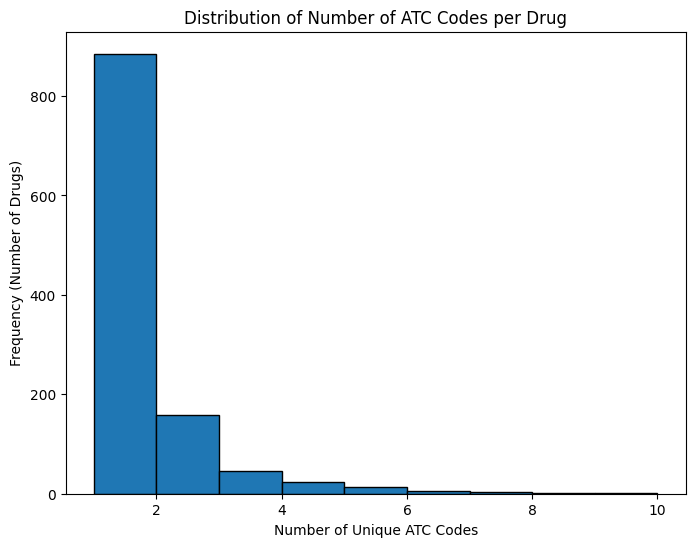

In [42]:
plt.figure(figsize=(8, 6))
plt.hist(atc_counts["atc_count"], bins=range(1, 11), edgecolor="black")
# sns.histplot(data = atc_counts['atc_code']) # type: ignore
plt.xlabel("Number of Unique ATC Codes")
plt.ylabel("Frequency (Number of Drugs)")
plt.title("Distribution of Number of ATC Codes per Drug")

In [7]:
drug_era_atc["atc_first_level"] = drug_era_atc["atc_code"].str[0]
atc_first_level_counts = drug_era_atc["atc_first_level"].value_counts()
print(atc_first_level_counts)

atc_first_level
A    223
N    218
D    173
C    158
S    150
R    132
J    120
G    107
L    102
B     72
M     64
P     34
H     32
V     32
Name: count, dtype: int64


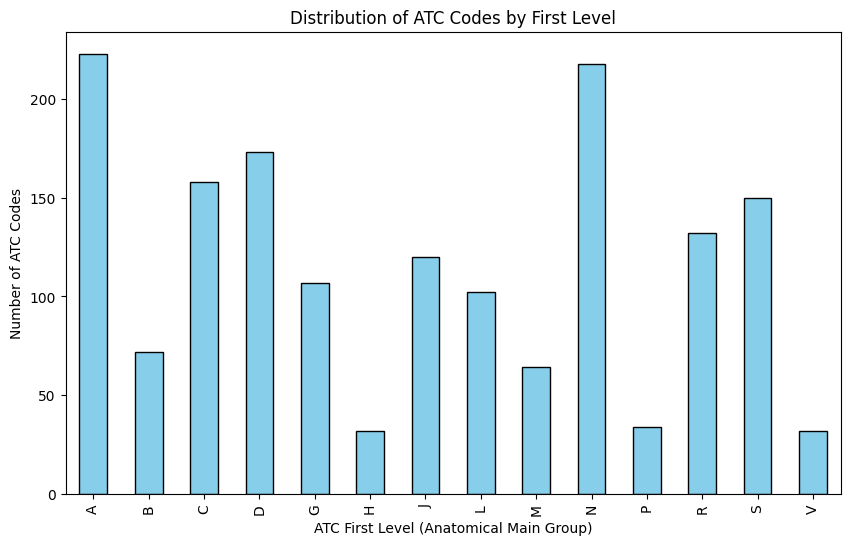

In [8]:
# Plot the data as a bar chart
plt.figure(figsize=(10, 6))
atc_first_level_counts.sort_index().plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("ATC First Level (Anatomical Main Group)")
plt.ylabel("Number of ATC Codes")
plt.title("Distribution of ATC Codes by First Level")
plt.show()

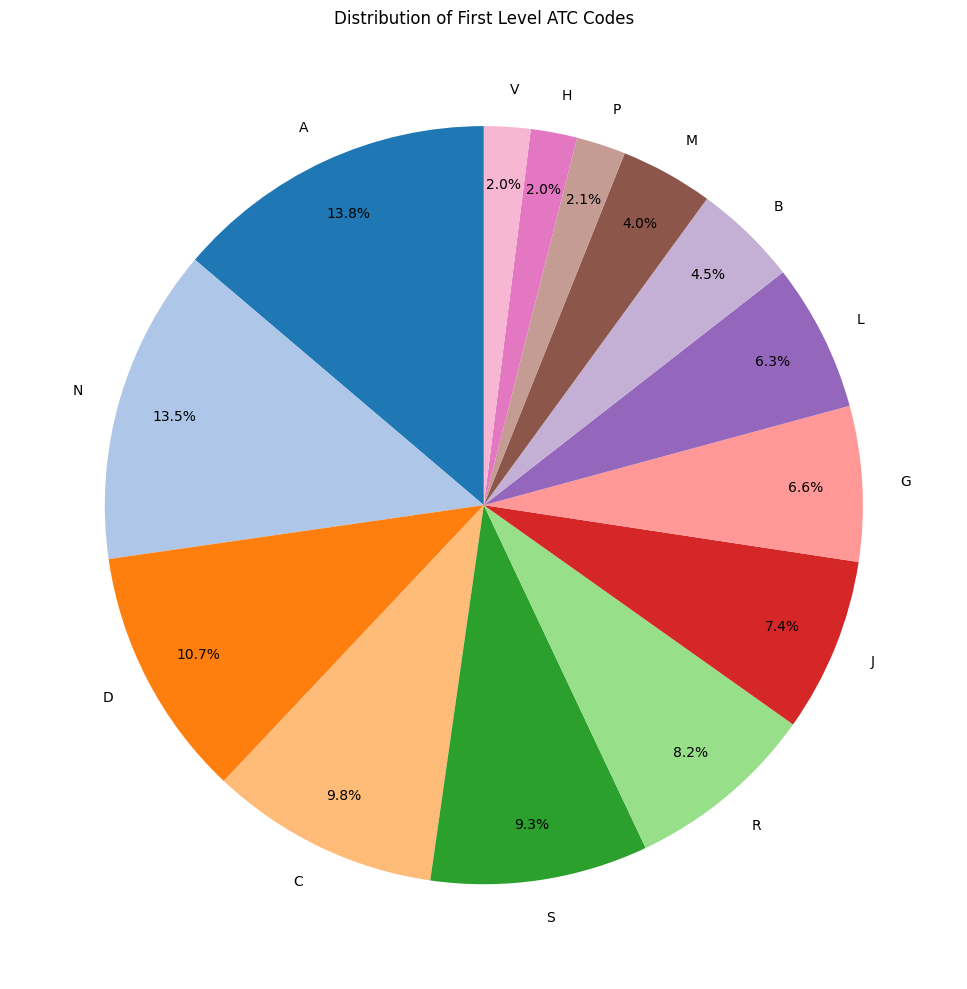

In [24]:
plt.figure(figsize=(10, 10))
plt.pie(
    atc_first_level_counts,
    labels=atc_first_level_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.tab20.colors,
    pctdistance=0.85,
    labeldistance=1.1,
)
plt.title("Distribution of First Level ATC Codes")
plt.tight_layout()
plt.show()

/var/folders/7w/rj_0j9_94558rkgpj7x7fydh0000gn/T/ipykernel_68155/807876696.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20c', len(atc_grouped.columns))


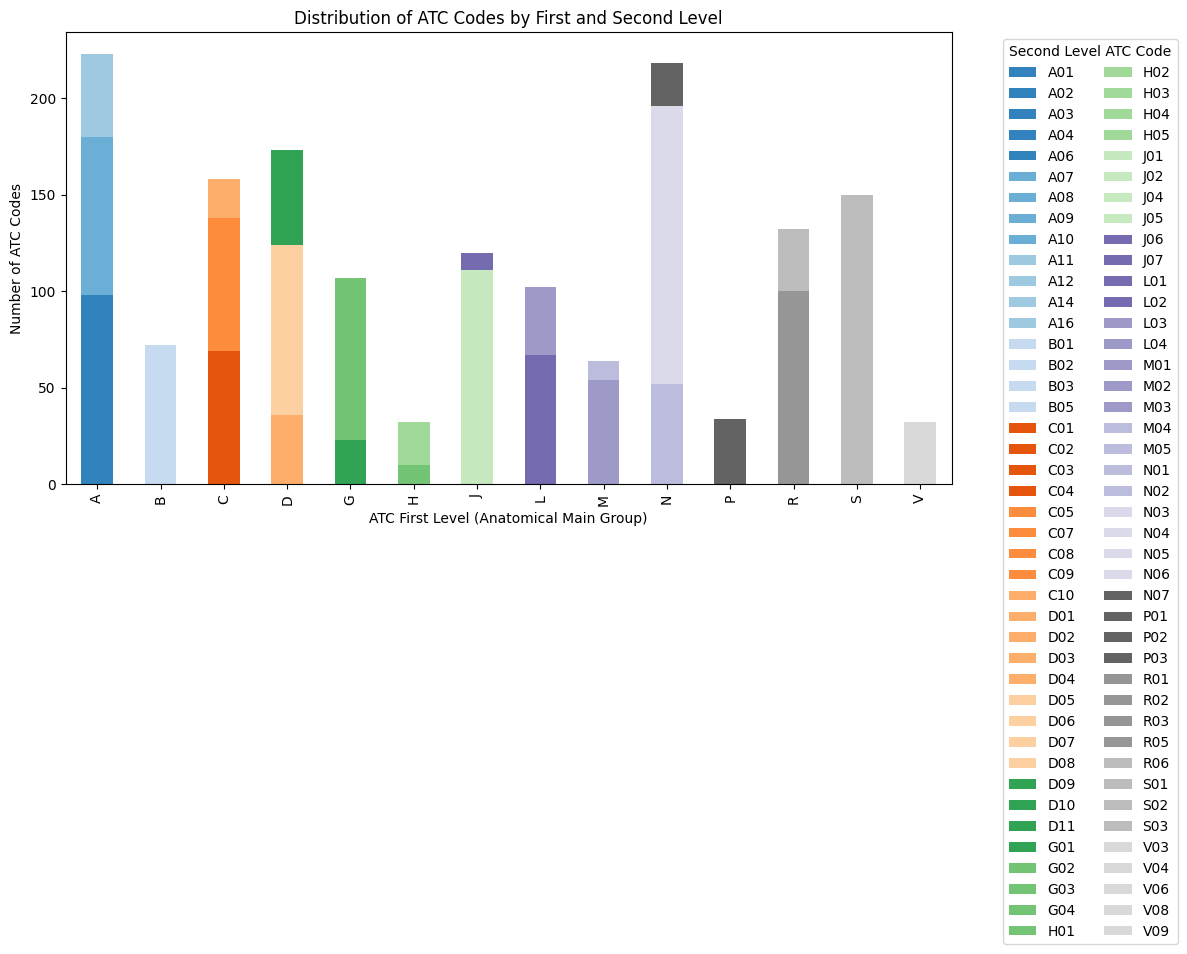

In [14]:
drug_era_atc["atc_first_level"] = drug_era_atc["atc_code"].str[0]  # First letter
drug_era_atc["atc_second_level"] = drug_era_atc["atc_code"].str[
    :3
]  # First three characters
atc_grouped = (
    drug_era_atc.groupby(["atc_first_level", "atc_second_level"])
    .size()
    .unstack(fill_value=0)
)
colors = plt.cm.get_cmap("tab20c", len(atc_grouped.columns))
atc_grouped.plot(kind="bar", stacked=True, figsize=(12, 8), colormap=colors)
plt.legend(
    title="Second Level ATC Code", bbox_to_anchor=(1.05, 1), loc="upper left", ncol=2
)  # Move it outside and use 2 columns
plt.xlabel("ATC First Level (Anatomical Main Group)")
plt.ylabel("Number of ATC Codes")
plt.title("Distribution of ATC Codes by First and Second Level")
plt.tight_layout()
plt.show()

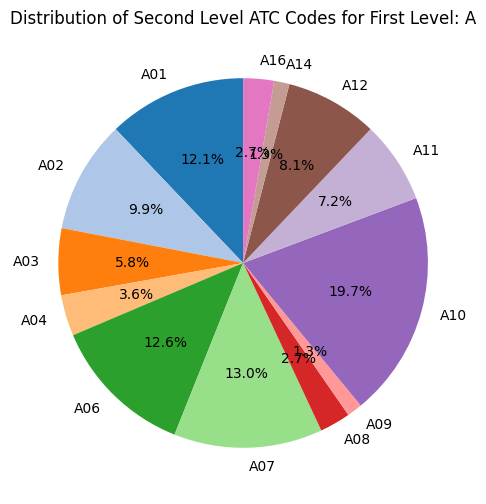

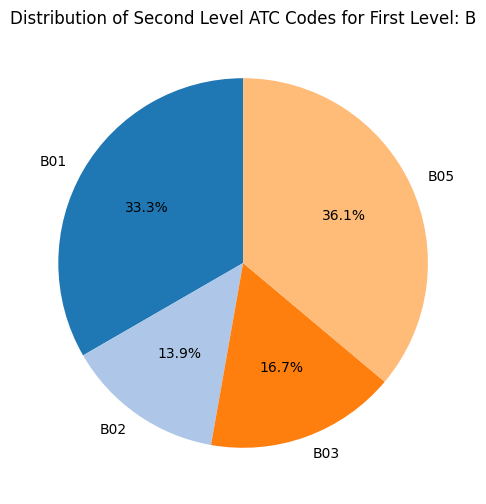

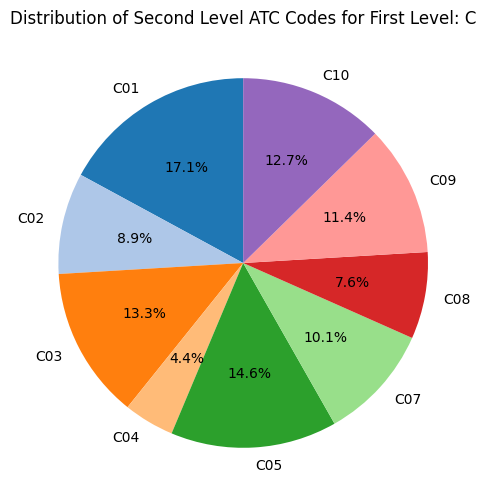

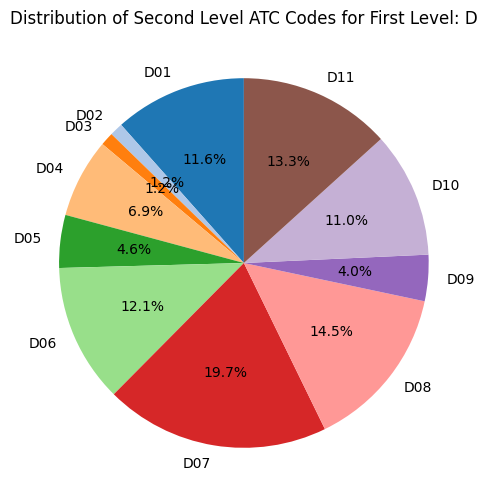

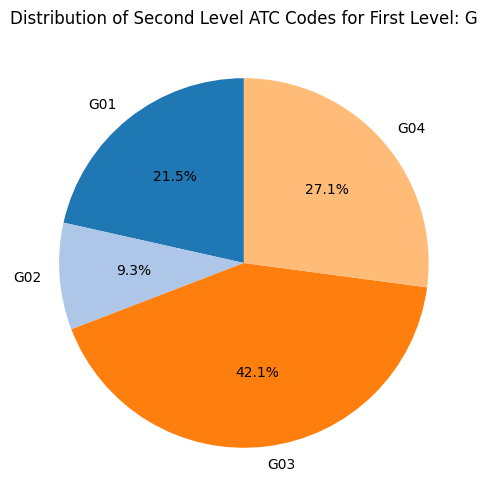

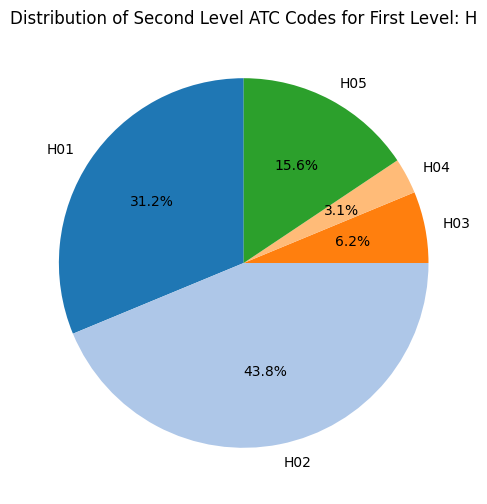

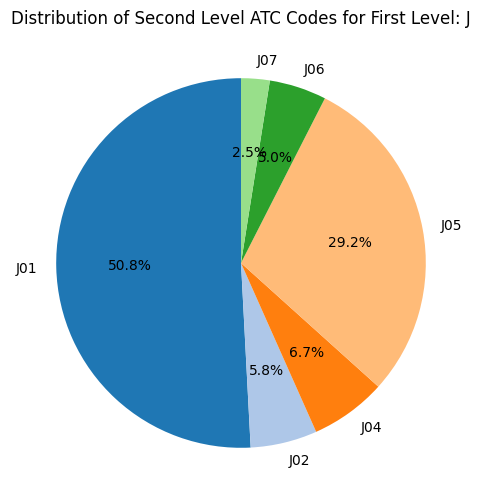

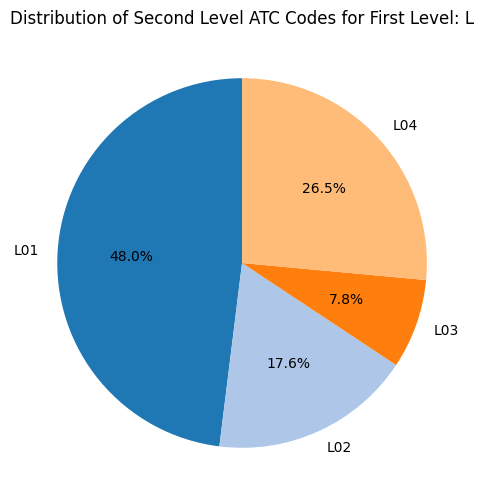

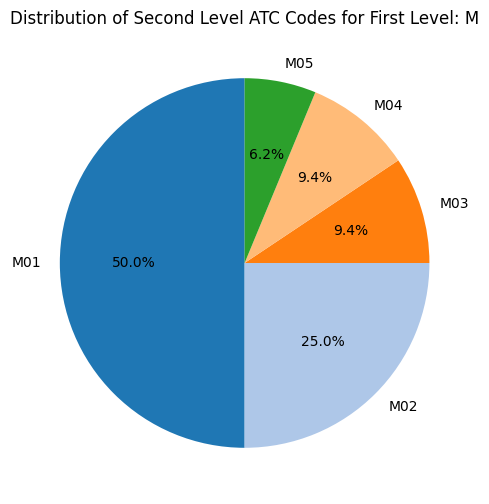

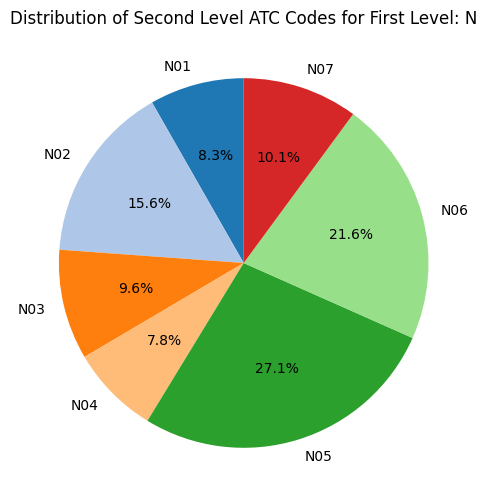

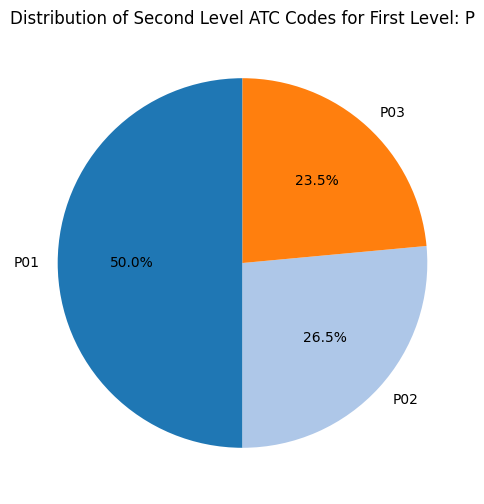

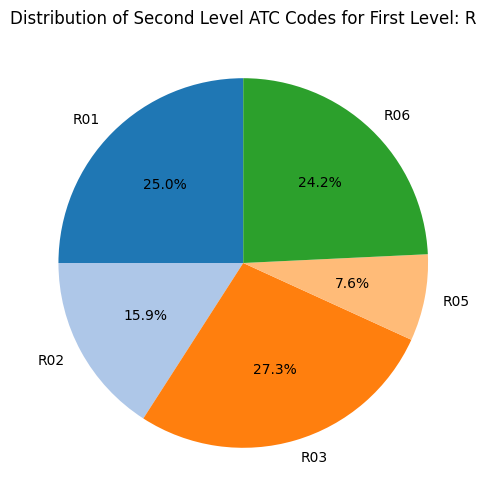

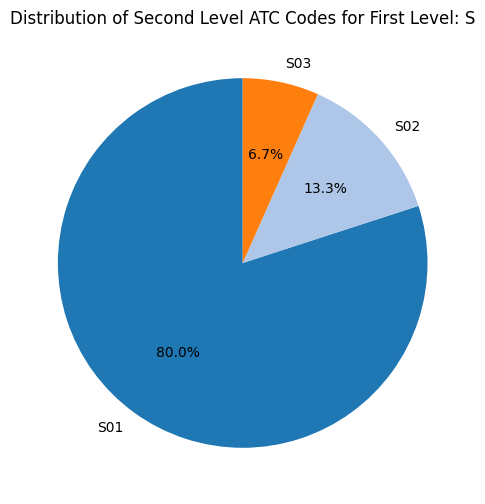

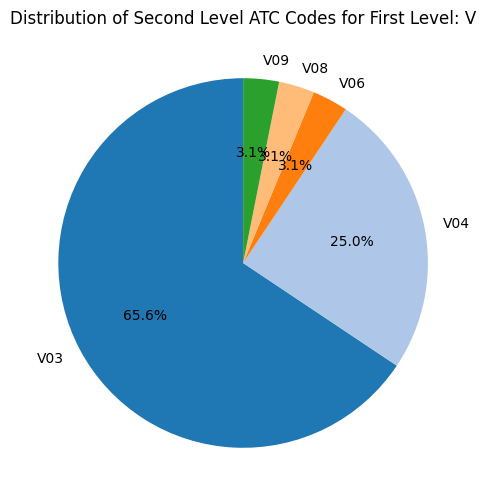

In [17]:
for first_level in atc_grouped.index:
    second_level_counts = atc_grouped.loc[first_level]

    # Filter out zero counts (second levels that don't exist in the data for this first level)
    second_level_counts = second_level_counts[second_level_counts > 0]

    # Plot pie chart for the current First Level ATC
    plt.figure(figsize=(6, 6))
    plt.pie(
        second_level_counts,
        labels=second_level_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=plt.cm.tab20.colors,
    )
    plt.title(f"Distribution of Second Level ATC Codes for First Level: {first_level}")
    plt.show()